# Even / Odd training small_vol
N2N (Noise2Noise) denoising del volumen empiar11415. Utiliza 2 volúmenes $V_1$ y $V_2$, donde $V_1$ es el volumen formado por los slices Z pares "even" y $V_2$ es el volumen formado por los slices Z impares "odd".

Todos los ficheros temporales se crean en `/nas/vruiz/cryoCARE/empiar11415`.

In [ ]:
# %pip install tensorflow==2.4

## Creamos $V_1$ y $V_2$

In [ ]:
%run split_even_odd.ipynb

## Configuramos cryoCARE

In [5]:
%%writefile /nas/vruiz/cryoCARE/small_vol/train_data_config__evenodd.json
{
    "even": ["even.mrc"],
    "odd": ["odd.mrc"],
    "mask": [""],
    "patch_shape": [8, 8, 8],
    "num_slices": 360,
    "split": 0.9,
    "tilt_axis": "Y",
    "n_normalization_samples": 200,
    "path": "./even_odd_data",
    "overwrite": "True"  
}

Overwriting /nas/vruiz/cryoCARE/small_vol/train_data_config__evenodd.json


In [6]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
source ~/envs/cryoCARE/bin/activate
cryoCARE_extract_train_data.py --conf train_data_config__evenodd.json

2025-10-21 11:33:40.262142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


even.data.shape=(20, 256, 256), sample_shape=[8, 8, 8]
Computing normalization parameters:


100%|██████████| 200/200 [00:00<00:00, 14468.11it/s]


## Entrenamos

In [7]:
%%writefile /nas/vruiz/cryoCARE/small_vol/train_config__evenodd.json
{
  "train_data": "./even_odd_data",
  "epochs": 50,
  "steps_per_epoch": 200,
  "batch_size": 16,
  "unet_kern_size": 3,
  "unet_n_depth": 3,
  "unet_n_first": 16,
  "learning_rate": 0.0004,
  "model_name": "model",
  "path": "./",
  "gpu_id": [1]
}

Writing /nas/vruiz/cryoCARE/small_vol/train_config__evenodd.json


In [9]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
source ~/envs/cryoCARE/bin/activate
cryoCARE_train.py --conf train_config__evenodd.json

2025-10-21 11:34:45.396026: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-21 11:34:46.683045: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-21 11:34:46.683743: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-21 11:34:46.703533: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-21 11:34:46.704938: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-21 11:34:46.704998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
0 1
1 8
2 8
3 8
4 1
Epoch 1/50


2025-10-21 11:34:50.296284: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2025-10-21 11:34:51.626937: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2025-10-21 11:34:51.685125: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-10-21 11:34:52.331626: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2025-10-21 11:34:52.628156: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2025-10-21 11:35:13.967969: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:656] In AUTO-mode, and switching to DATA-based sharding, instead of FILE-based sharding 

200/200 [==============================] - 38s 71ms/step - loss: 0.7896 - mse: 0.7896 - mae: 0.6880 - val_loss: 0.6351 - val_mse: 0.6351 - val_mae: 0.6234
Epoch 2/50
200/200 [==============================] - 2s 10ms/step - loss: 0.6209 - mse: 0.6209 - mae: 0.6177 - val_loss: 0.6089 - val_mse: 0.6089 - val_mae: 0.6142
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.5995 - mse: 0.5995 - mae: 0.6074 - val_loss: 0.5958 - val_mse: 0.5958 - val_mae: 0.6075
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 0.5947 - mse: 0.5947 - mae: 0.6048 - val_loss: 0.6018 - val_mse: 0.6018 - val_mae: 0.6115
Epoch 5/50
200/200 [==============================] - 2s 11ms/step - loss: 0.5928 - mse: 0.5928 - mae: 0.6036 - val_loss: 0.6073 - val_mse: 0.6073 - val_mae: 0.6117
Epoch 6/50
200/200 [==============================] - 2s 10ms/step - loss: 0.5895 - mse: 0.5895 - mae: 0.6026 - val_loss: 0.6156 - val_mse: 0.6156 - val_mae: 0.6172
Epoch 7/50
200/200 [

## Inferimos

In [10]:
%%writefile /nas/vruiz/cryoCARE/small_vol/predict_config__evenodd.json
{
    "path": "./model.tar.gz",
    "even": ["small_vol.mrc"], 
    "odd": ["small_vol.mrc"],
    "n_tiles": [1,1,1],
    "output": "even_odd_denoised",
    "overwrite": "True",
    "gpu_id": [1]
}

Writing /nas/vruiz/cryoCARE/small_vol/predict_config__evenodd.json


In [13]:
%%bash
cd /nas/vruiz/cryoCARE/small_vol
pwd
source ~/envs/cryoCARE/bin/activate
cryoCARE_predict.py --conf predict_config__evenodd.json || true

/nas/vruiz/cryoCARE/small_vol


2025-10-21 11:41:01.213011: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2025-10-21 11:41:02.549097: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-10-21 11:41:02.549850: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-10-21 11:41:02.569811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-10-21 11:41:02.571223: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA A30 computeCapability: 8.0
coreClock: 1.44GHz coreCount: 56 deviceMemorySize: 23.60GiB deviceMemoryBandwidth: 869.04GiB/s
2025-10-21 11:41:02.571291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

Looking for GPU with ID: 1
GPU 1 successfully found
Loading network weights from 'weights_best.h5'.
(32, 256, 256, 1)


100%|██████████| 4/4 [00:00<00:00, 12.28it/s]    


['' '' '' '' '' '' '' ''
 'cryoCARE                                                21-Oct-25  11:41:16     '
 '']


In [14]:
import mrcfile
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [15]:
def read_MRC(path_file):
    return mrcfile.read(mrc_file_path)

In [16]:
mrc_file_path = '/nas/vruiz/cryoCARE/small_vol/small_vol.mrc'
original_volume = read_MRC(mrc_file_path)

In [17]:
original_volume.shape

(32, 256, 256)

In [18]:
mrc_file_path = '/nas/vruiz/cryoCARE/small_vol/even_odd_denoised/small_vol.mrc'
denoised_volume = read_MRC(mrc_file_path)

In [19]:
denoised_volume.shape

(32, 256, 256)

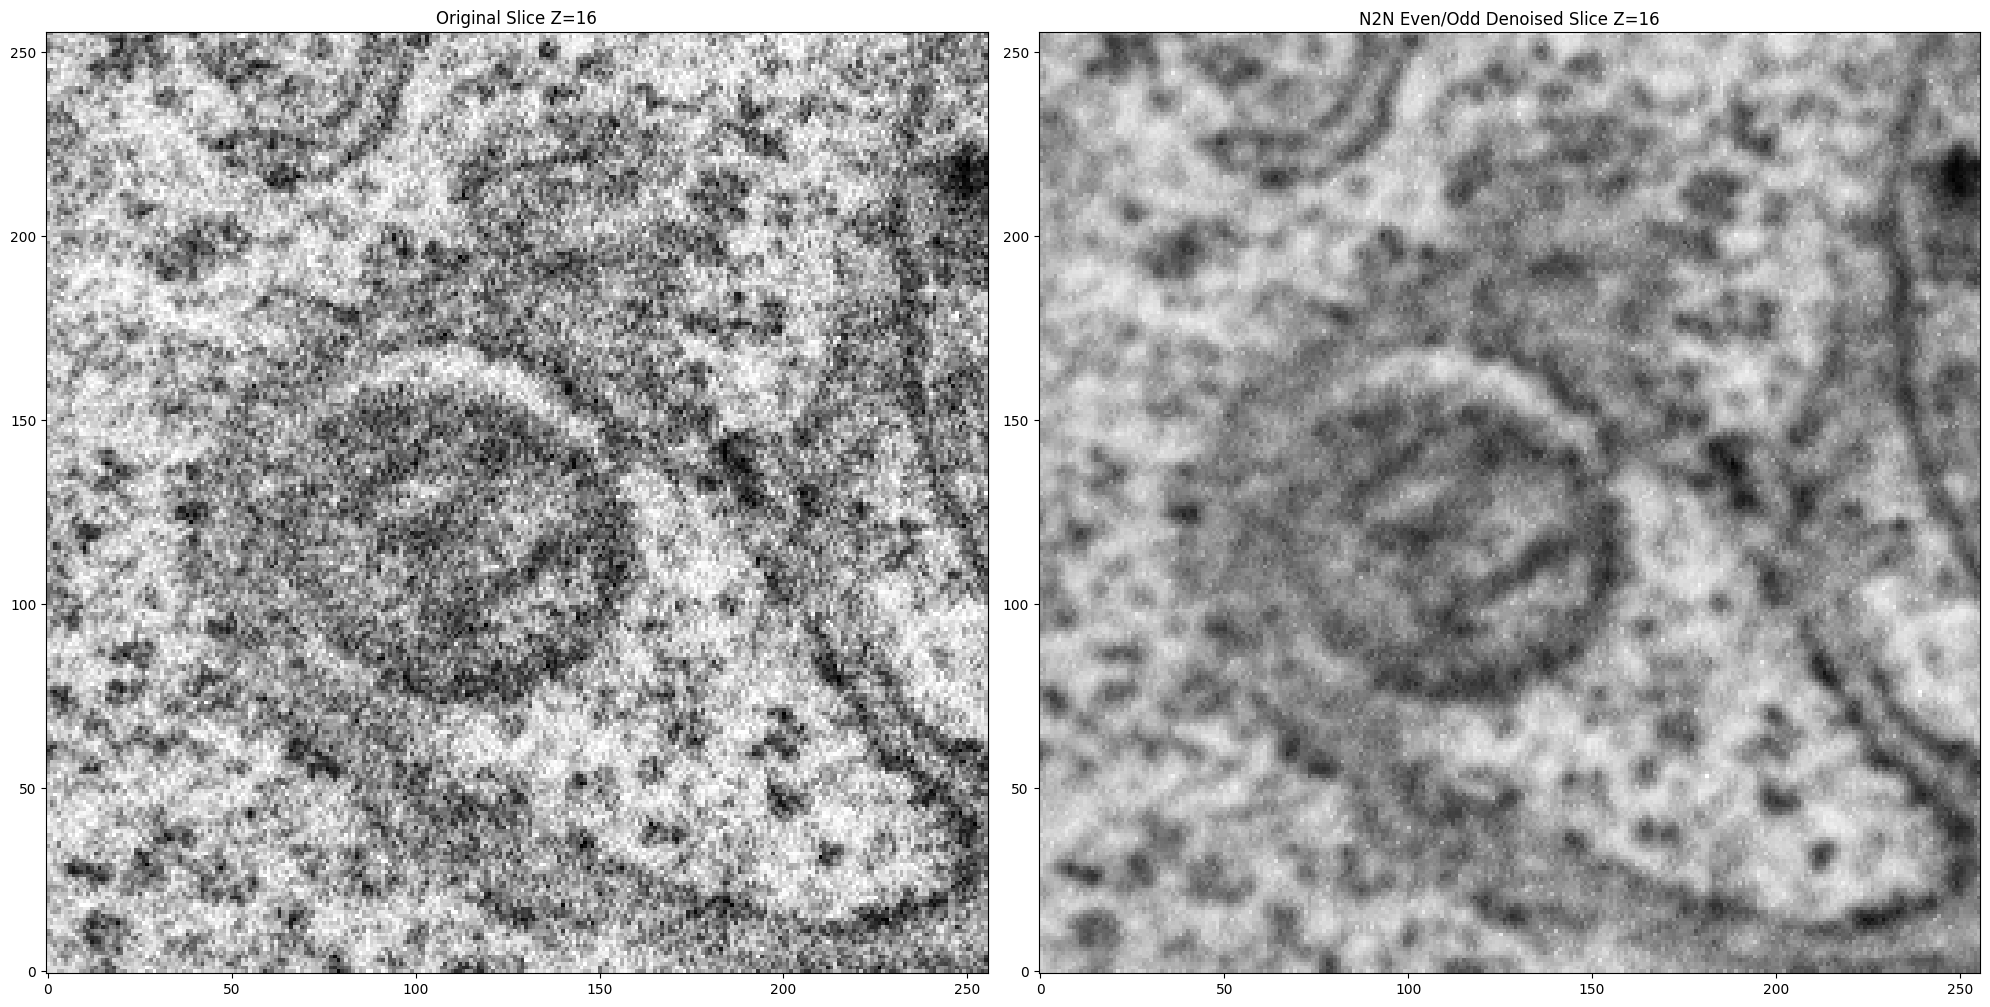

In [20]:
# Choose a slice index in the middle of the volume for a good comparison
slice_idx = original_volume.shape[0] // 2

fig, axes = plt.subplots(1, 2, figsize=(20, 20))

# Plot the original slice z
im1 = axes[0].imshow(original_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[0].set_title(f'Original Slice Z={slice_idx}')
axes[0].grid(False)

# Plot the original slice z+1
im2 = axes[1].imshow(denoised_volume[slice_idx, :, :].T, cmap='gray', origin='lower')
axes[1].set_title(f'N2N Even/Odd Denoised Slice Z={slice_idx}')
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [21]:
%pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

  Cloning https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to /tmp/pip-install-h23bnxmc/self-fourier-shell-correlation_fb3a2b77d04b419baf0d4d53c1b1d790
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation /tmp/pip-install-h23bnxmc/self-fourier-shell-correlation_fb3a2b77d04b419baf0d4d53c1b1d790
  Resolved https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation to commit f785ed2aa883d5362036cc66d26498286c9a48ff
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip show self_fourier_shell_correlation

Name: self_fourier_shell_correlation
Version: 0.0.1
Summary: Self Fourier shell correlation (https://www.nature.com/articles/s42003-023-05724-y)
Home-page: https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation
Author: 
Author-email: "Eric J. Verbeke" <ev9102@princeton.edu>, Vicente González Ruiz <vicente.gonzalez.ruiz@gmail.com>
License: 
Location: /nas/vruiz/envs/cryoCARE/lib/python3.8/site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [23]:
import sys
print(sys.executable)

/home/jupyter-vruiz/envs/cryoCARE/bin/python


In [24]:
%pip install "shuffling @ git+https://github.com/vicente-gonzalez-ruiz/shuffling"

  Cloning https://github.com/vicente-gonzalez-ruiz/shuffling to /tmp/pip-install-2kfd4n0r/shuffling_fcbeba2f85664416a5b7a7ef933a45c1
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/shuffling /tmp/pip-install-2kfd4n0r/shuffling_fcbeba2f85664416a5b7a7ef933a45c1
  Resolved https://github.com/vicente-gonzalez-ruiz/shuffling to commit 0710ed80bd40725b8fd116352c8e58a97f96528b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"

  Cloning https://github.com/vicente-gonzalez-ruiz/motion_estimation to /tmp/pip-install-2j7wvlaw/motion-estimation_fb875bfe31384502ac3e825a2718cd6f
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/motion_estimation /tmp/pip-install-2j7wvlaw/motion-estimation_fb875bfe31384502ac3e825a2718cd6f
  Resolved https://github.com/vicente-gonzalez-ruiz/motion_estimation to commit aa8deb4a9889d36b55c55b03c6497d61c034fa3d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [27]:
from self_fourier_shell_correlation import fsc_utils as fsc

In [28]:
import mrcfile

In [29]:
import matplotlib.pyplot as plt

In [30]:
even = mrcfile.read("/nas/vruiz/cryoCARE/small_vol/even.mrc")

In [31]:
odd = mrcfile.read("/nas/vruiz/cryoCARE/small_vol/odd.mrc")

In [32]:
spatial_freq, fsc_values = fsc.fourier_shell_correlation(even, odd, shell_thickness=0.01)

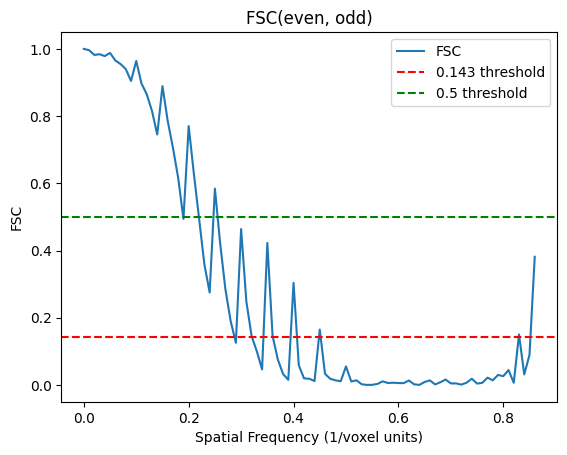

In [33]:
fsc.plot_fsc(spatial_freq, fsc_values, "Spatial Frequency (1/voxel units)", "FSC", "FSC(even, odd)")